# LENDING CLUB CASE STUDY
  

## Business Understanding

You work for a __consumer finance company__ which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. __Two types of risks__ are associated with the bank’s decision:

- If the applicant is __likely to repay__ the loan, then not approving the loan results in a __loss of business__ to the company

- If the applicant is __not likely to repay the loan__, i.e. he/she is likely to default, then approving the loan may lead to a __financial loss__ for the company

<br/>

The data set (loans.csv) contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

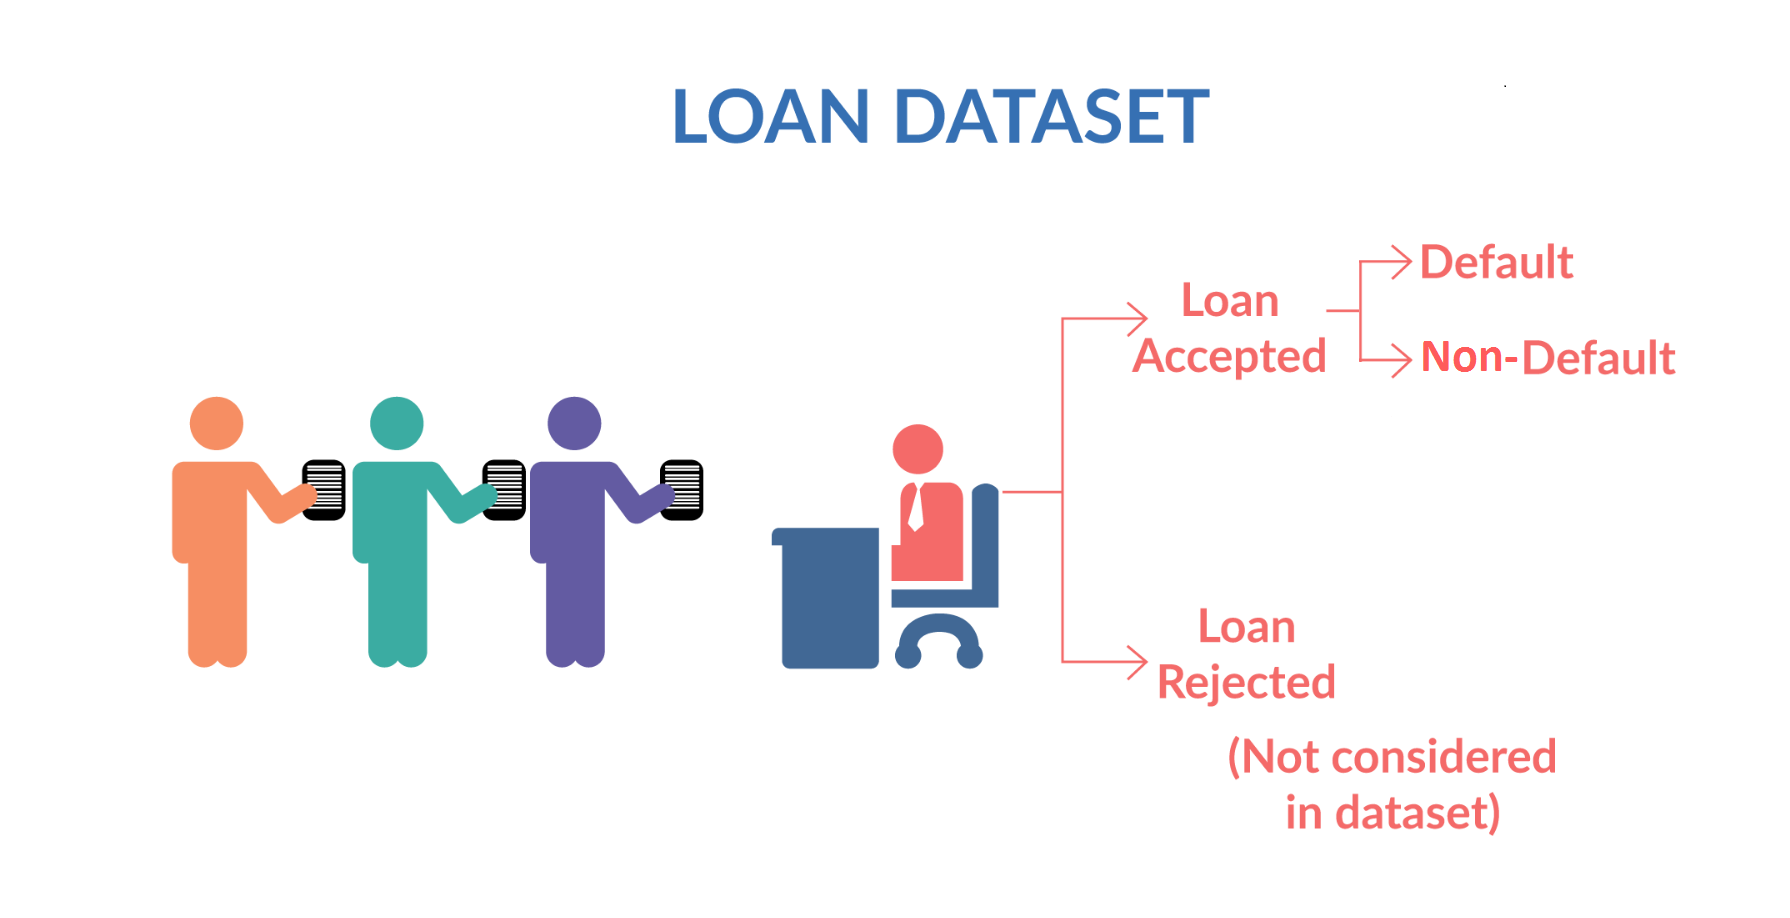

When a person applies for a loan, there are __two types of decisions__ that could be taken by the company:

1. __Loan accepted__: If the company approves the loan, there are 3 possible scenarios described below:

    1. __Fully paid__: Applicant has fully paid the loan (the principal and the interest rate)

    2. __Current__: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    3. __Charged-off__: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. __Loan rejected__: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

## Business Objectives:

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who __default__ cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the __driving factors (or driver variables)__ behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 400)

In [2]:
# Read loan data
raw_loan = pd.read_csv("loan.csv")

C:\Users\Nagaraju_Brahmanapal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# to avoid above warning
raw_loan = pd.read_csv("loan.csv", low_memory=False)

### DATA UNDERSTANDING

In [4]:
# check the shape
raw_loan.shape

(39717, 111)

In [5]:
# list first 10 records
raw_loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Pers

In [6]:
# get the statistical description(min, max, etc)
raw_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0

### DATA CLEANING

In [7]:
# check information about columns
raw_loan.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

__From above there are many columns which has all null values(non-null count=0)__ Identify those columns and remove from dataset

In [8]:
# check for any columns having null values
raw_loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# finding null columns
nacols = raw_loan.isna().sum()

In [10]:
nacols = nacols.apply(lambda x: x if x == len(raw_loan) else None)

In [11]:
nacols[:-1]

id                          nan
member_id                   nan
loan_amnt                   nan
funded_amnt                 nan
funded_amnt_inv             nan
                         ...   
pub_rec_bankruptcies        nan
tax_liens                   nan
tot_hi_cred_lim        39717.00
total_bal_ex_mort      39717.00
total_bc_limit         39717.00
Length: 110, dtype: float64

In [12]:
nacols = nacols.dropna()

In [13]:
nacols = list(nacols.index)

In [14]:
# print columns whose value is null
print("Null columns: {}".format(nacols))

Null columns: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_i

In [15]:
# Number of null columns
print("Number of null columns: ", len(nacols))

Number of null columns:  54


In [16]:
# Now drop these null columns
loan_data = raw_loan.drop(columns=nacols)

In [17]:
# after dropping loan_data shape
loan_data.shape

(39717, 57)

In [18]:
# check the columns infor after dropping null columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [19]:
# print columns
sorted(list(loan_data.columns))

['acc_now_delinq',
 'addr_state',
 'annual_inc',
 'application_type',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'initial_list_status',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'policy_code',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'pymnt_plan',
 'recoveries',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'tax_liens',
 'term',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'verification_status',
 'zip_code']

<br>__The columns can be classified into below 3 different categories:__<br>
1. Customer (applicant) demographic 
2. Loan related information & characteristics 
3. Customer behaviour (if the loan is granted)

Among the above categories we are interested in only first 2 categories as the main goal is to observe the variables that effect loan defaulters.

So, drop columns that are related to Customer Behaviour

In [20]:
# dropping customer behaviour columns
customer_behaviour_cols = [
    "delinq_2yrs",
    "earliest_cr_line",
    "inq_last_6mths",
    "open_acc",
    "pub_rec",
    "revol_bal",
    "revol_util",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "last_credit_pull_d",
    "application_type"
]

In [21]:
loan_data = loan_data.drop(columns=customer_behaviour_cols)

In [22]:
# check loan_data shape
loan_data.shape

(39717, 37)

In [23]:
# now observe for any other columns which may not be useful to determine the loan default
sorted(list(loan_data.columns))

['acc_now_delinq',
 'addr_state',
 'annual_inc',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'delinq_amnt',
 'desc',
 'dti',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'initial_list_status',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'policy_code',
 'pub_rec_bankruptcies',
 'purpose',
 'pymnt_plan',
 'sub_grade',
 'tax_liens',
 'term',
 'title',
 'total_acc',
 'url',
 'verification_status',
 'zip_code']

In [24]:
# also check for any na values
(loan_data.isna().sum()/len(loan_data))*100

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
mths_since_last_delinq       64.66
mths_since_last_record       92.99
total_acc                     0.00
initial_list_status 

In [25]:
# from above missing percentage values drop columns which have more than 50% missing values
loan_data = loan_data.drop(columns=["next_pymnt_d", "mths_since_last_record", "mths_since_last_delinq"])

In [26]:
# checking for missing percentage again
(loan_data.isna().sum()/len(loan_data))*100

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
total_acc                     0.00
initial_list_status           0.00
collections_12_mths_ex_med    0.14
policy_code         

In [27]:
# check for distinct values
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
total_acc                        82
initial_list_status               1
collections_12_mths_ex_med  

In [28]:
loan_data.pub_rec_bankruptcies.value_counts() * 100 / len(loan_data)

0.00   94.01
1.00    4.21
2.00    0.02
Name: pub_rec_bankruptcies, dtype: float64

In [29]:
loan_data.title.value_counts()

Debt Consolidation                2184
Debt Consolidation Loan           1729
Personal Loan                      659
Consolidation                      517
debt consolidation                 505
                                  ... 
Moving to Cambridge for school       1
BF Consolidation Loan                1
Bathroom/Kitchen remodeling          1
salvation                            1
Discover Consolidation               1
Name: title, Length: 19615, dtype: int64

In [30]:
# check if loan_amnt and funded_amnt are same
(loan_data.loan_amnt == loan_data.funded_amnt).value_counts()

True     37868
False     1849
dtype: int64

As loan loand_amnt and funded_amnt are not same we may use both columns for analysis

In [31]:
# now remove non-required columns
# cols that are not used for analysis are
# id - not required
# member_id - not required
# pymnt_plan - fixed value as n for all
# url - not useful
# desc - not useful instead purpose is usefule which is short
# title - too many distinct values not useful
# zip_code - complete zip is not available
# initial_list_status - fixed value as f for all
# delinq_amnt - all has value 0 - single value
# tax_liens - all has value 0 - single value
# pub_rec_bankruptcies - 94% of data has single value
# collections_12_mths_ex_med - single value
# chargeoff_within_12_mths - single value 
# acc_now_delinq - single value
# policy_code - single value
# title - seems like elaboration of purpose column
# emp_title - not usefule as it is a employer name
not_useful_cols = [
    "id", 
    "member_id", 
    "pymnt_plan", 
    "url", 
    "desc", 
    "title",
    "zip_code",
    "initial_list_status", 
    "delinq_amnt", 
    "tax_liens",
    "pub_rec_bankruptcies",
    "collections_12_mths_ex_med",
    "chargeoff_within_12_mths",
    "acc_now_delinq",
    "policy_code",
    "title",
    "emp_title"
]

In [32]:
# dropping not useful columns
loan_data = loan_data.drop(columns=not_useful_cols)

In [33]:
loan_data.shape

(39717, 18)

In [34]:
# check for any missing data
loan_data.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
total_acc                 0
dtype: int64

In [37]:
# check for any missing percentage data
loan_data.isna().sum() * 100 / len(loan_data)

loan_amnt             0.00
funded_amnt           0.00
funded_amnt_inv       0.00
term                  0.00
int_rate              0.00
installment           0.00
grade                 0.00
sub_grade             0.00
emp_length            2.71
home_ownership        0.00
annual_inc            0.00
verification_status   0.00
issue_d               0.00
loan_status           0.00
purpose               0.00
addr_state            0.00
dti                   0.00
total_acc             0.00
dtype: float64

In [36]:
# now we have 18 columns among which "emp_length" has some missing values
# see the value counts for emp_length
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [38]:
# as the missing percentage is only ~3% let's remove the missing value rows
loan_data = loan_data.dropna(axis=0, subset=["emp_length"])

In [40]:
loan_data.shape

(38642, 18)

Now, the row count reduced, check for any other missing data

In [41]:
loan_data.isna().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
total_acc              0
dtype: int64

There are no missing values in any columns, now let's standardize the column values

### Data Standardization

In [42]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38642 non-null  int64  
 1   funded_amnt          38642 non-null  int64  
 2   funded_amnt_inv      38642 non-null  float64
 3   term                 38642 non-null  object 
 4   int_rate             38642 non-null  object 
 5   installment          38642 non-null  float64
 6   grade                38642 non-null  object 
 7   sub_grade            38642 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       38642 non-null  object 
 10  annual_inc           38642 non-null  float64
 11  verification_status  38642 non-null  object 
 12  issue_d              38642 non-null  object 
 13  loan_status          38642 non-null  object 
 14  purpose              38642 non-null  object 
 15  addr_state           38642 non-null 

In [43]:
loan_data.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc
35306,4200,4200,4000.00,36 months,14.26%,144.09,C,C5,10+ years,RENT,61512.00,Not Verified,Sep-09,Charged Off,other,GA,12.11,13
3157,3000,3000,3000.00,36 months,12.42%,100.25,B,B4,9 years,RENT,31200.00,Not Verified,Nov-11,Fully Paid,other,IL,15.04,17
17369,20000,20000,19975.00,36 months,10.74%,652.32,B,B4,10+ years,RENT,65000.00,Verified,Apr-11,Fully Paid,debt_consolidation,CA,12.90,29
21520,7425,7425,7425.00,60 months,10.36%,159.08,B,B5,< 1 year,OWN,57000.00,Not Verified,Jan-11,Fully Paid,home_improvement,NC,21.68,13
34058,15000,15000,14999.45,36 months,15.65%,524.80,D,D4,< 1 year,OWN,80832.00,Not Verified,Nov-09,Fully Paid,home_improvement,AZ,9.47,21
36642,2800,2800,2800.00,36 months,10.95%,91.60,B,B1,< 1 year,RENT,24000.00,Not Verified,May-09,Fully Paid,educational,HI,4.15,18
21985,5000,5000,5000.00,36 months,8.88%,158.72,B,B1,2 years,RENT,72467.00,Source Verified,Dec-10,Fully Paid,major_purchase,DC,15.27,24
34369,15000,15000,14963.67,36 months,12.18%,499.50,B,B4,3 years,OWN,32000.00,Not Verified,Nov-09,Fully Paid,major_purchase,PA,2.70,6
18924,10000,10000,9711.87,60 months,10.37%,214.30,B,B3,10+ years,MORTGAGE,68000.00,Source Verified,Feb-11,Fully Paid,debt_consolidation,FL,19.62,38
9488,35000,35000,34725.00,36 months,17.49%,1256.40,D,D5,10+ years,MORTGAGE,130000.00,Verified,Aug-11,Fully Paid,credit_card,MN,17.80,28


In [46]:
# int_rate has % symbole trim it and convert it to numeric data
# term has text data "months" trim it and convert it to numberic data
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x: x.rstrip("%")))
loan_data.term = pd.to_numeric(loan_data.term.apply(lambda x: x.split()[0]))

In [47]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38642 non-null  int64  
 1   funded_amnt          38642 non-null  int64  
 2   funded_amnt_inv      38642 non-null  float64
 3   term                 38642 non-null  int64  
 4   int_rate             38642 non-null  float64
 5   installment          38642 non-null  float64
 6   grade                38642 non-null  object 
 7   sub_grade            38642 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       38642 non-null  object 
 10  annual_inc           38642 non-null  float64
 11  verification_status  38642 non-null  object 
 12  issue_d              38642 non-null  object 
 13  loan_status          38642 non-null  object 
 14  purpose              38642 non-null  object 
 15  addr_state           38642 non-null 

In [48]:
loan_data.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc
32499,16500,16500,16500.00,36,16.45,583.73,E,E1,9 years,OWN,96000.00,Not Verified,Feb-10,Charged Off,debt_consolidation,NY,15.10,19
25542,4200,4200,4200.00,36,15.21,146.03,D,D2,< 1 year,RENT,21000.00,Verified,Sep-10,Fully Paid,credit_card,WI,12.00,9
39269,6000,6000,5400.00,36,8.63,189.77,A,A5,< 1 year,RENT,39000.00,Not Verified,Feb-08,Fully Paid,credit_card,TX,11.20,23
6945,10000,10000,10000.00,36,6.62,307.04,A,A2,< 1 year,MORTGAGE,90000.00,Verified,Sep-11,Fully Paid,home_improvement,VA,6.37,8
15454,3500,3500,3500.00,60,16.89,86.78,D,D4,5 years,RENT,14000.00,Source Verified,May-11,Fully Paid,car,TX,3.00,8
8862,11000,11000,11000.00,36,11.99,365.31,B,B5,6 years,RENT,45000.00,Not Verified,Aug-11,Fully Paid,debt_consolidation,CA,8.96,20
4222,2750,2750,2750.00,36,16.77,97.74,D,D2,2 years,RENT,16800.00,Source Verified,Nov-11,Fully Paid,credit_card,CA,19.71,6
23887,12000,8700,8449.05,60,8.88,180.10,B,B1,2 years,RENT,125000.00,Source Verified,Nov-10,Fully Paid,small_business,NY,23.99,35
6052,5000,5000,5000.00,36,12.69,167.73,B,B5,5 years,MORTGAGE,100000.00,Source Verified,Oct-11,Fully Paid,home_improvement,MI,20.69,35
22039,3125,3125,2625.00,36,12.61,104.71,C,C2,3 years,RENT,20400.00,Source Verified,Dec-10,Fully Paid,debt_consolidation,CA,20.53,6


In [49]:
# check for different types of loan_status which is important column
loan_data.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [52]:
# Among three types of loan_status we are not interested in "Current" which mean loan is in progress
# Remove data whose loan_status = 'Current'
loan_data = loan_data[loan_data.loan_status != 'Current']

In [53]:
loan_data.shape

(37544, 18)

In [54]:
loan_data.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [56]:
# convert the "loan_status" column to 0 and 1 as it has values of type yes or no
# 0 means "Fully Paid" and 1 means "Charged Off"
loan_data.loan_status = loan_data.loan_status.apply(lambda x: 0 if x == "Fully Paid" else 1)

C:\Users\Nagaraju_Brahmanapal\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37544 non-null  int64  
 1   funded_amnt          37544 non-null  int64  
 2   funded_amnt_inv      37544 non-null  float64
 3   term                 37544 non-null  int64  
 4   int_rate             37544 non-null  float64
 5   installment          37544 non-null  float64
 6   grade                37544 non-null  object 
 7   sub_grade            37544 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       37544 non-null  object 
 10  annual_inc           37544 non-null  float64
 11  verification_status  37544 non-null  object 
 12  issue_d              37544 non-null  object 
 13  loan_status          37544 non-null  int64  
 14  purpose              37544 non-null  object 
 15  addr_state           37544 non-null 

In [58]:
# check purpose value counts
loan_data.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

### Check for any outliers

In [59]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,total_acc
count,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00
mean,11119.33,10853.56,10280.50,41.92,11.96,324.65,69407.08,0.14,13.28,22.08
std,7354.10,7096.32,7034.12,10.34,3.68,208.90,64676.98,0.35,6.66,11.42
min,500.00,500.00,0.00,36.00,5.42,15.69,4000.00,0.00,0.00,2.00
25%,5500.00,5400.00,5000.00,36.00,8.94,167.37,41000.00,0.00,8.16,13.00
50%,10000.00,9600.00,8850.00,36.00,11.83,280.00,60000.00,0.00,13.38,20.00
75%,15000.00,15000.00,14075.00,36.00,14.42,428.94,83000.00,0.00,18.55,29.00
max,35000.00,35000.00,35000.00,60.00,24.40,1305.19,6000000.00,1.00,29.99,90.00


    From above statistics it can be observed that there is huge difference between 75% quantile and max value for "annual_inc" which clearly shows an outlier.

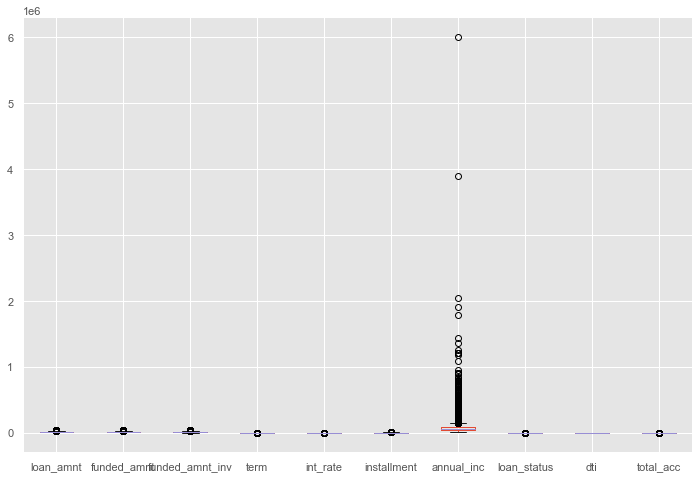

In [61]:
loan_data.boxplot()
plt.show()

    From Above Box plot it can be observed that annual_inc has some outliers

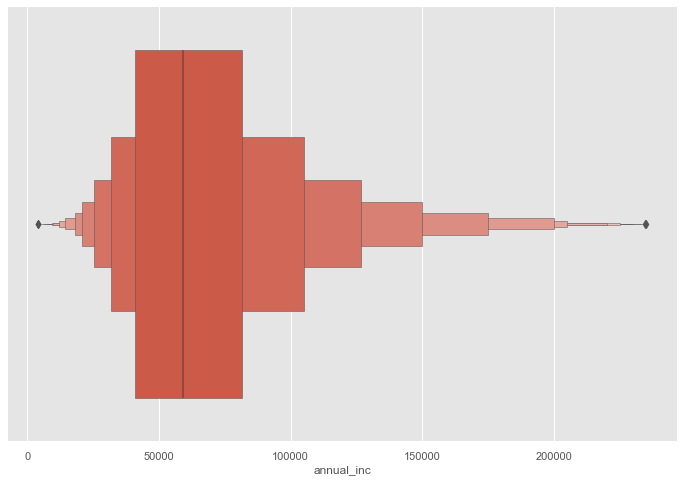

In [88]:
# boxplot of annual_inc
sns.boxenplot(x=loan_data.annual_inc)
plt.show()

In [74]:
# count the outlier records whose annual_inc > 75% quantile
loan_data[loan_data['annual_inc'] > 83000].annual_inc.count()

9344

    There are around 9344 records whose annual_in > 75th percentile. Let's see for 99 percentile.

In [77]:
# count the recoreds whose annual_inc > 99% quantile
annual_inc_99_q = loan_data["annual_inc"].quantile(0.99)
print("99 % quantile value: ", annual_inc_99_q)

99 % quantile value:  235000.0


In [79]:
# count records whose values above 99% quantile
loan_data[loan_data.annual_inc > annual_inc_99_q].annual_inc

392     276000.00
1210    243600.00
1348    264000.00
1463    525000.00
1617    280000.00
           ...   
39438   522000.00
39554   616000.00
39578   275000.00
39611   480000.00
39692   250000.00
Name: annual_inc, Length: 371, dtype: float64

In [80]:
# before dropping above 99% quantile values check if these values exists for loan_status=1
loan_data[(loan_data.annual_inc > annual_inc_99_q) & (loan_data.loan_status == 1)].annual_inc

1463     525000.00
3915     270000.00
4910     250000.00
5670     270000.00
5775     250000.00
5820     400000.00
9253     300000.00
10444    254616.00
10621   1250000.00
11929    340000.00
13480    487000.00
13994    300000.00
17875    300000.00
18338    275000.00
20567    250000.00
21980    304800.00
22164    350000.00
23583    250000.00
24455    550000.00
25643    780000.00
26183    290000.00
26675    700053.85
28989    540000.00
29657    242004.00
29714    358680.00
30011    840000.00
30197    660000.00
31456    320000.00
32845    240000.00
32959    384000.00
33019    240000.00
33062    600000.00
34563    235800.00
34699    700000.00
36058    237000.00
37068    265000.00
38322    350000.00
39554    616000.00
39578    275000.00
Name: annual_inc, dtype: float64

In [81]:
loan_data[(loan_data.annual_inc > annual_inc_99_q) & (loan_data.loan_status == 1)].annual_inc.count()

39

In [82]:
loan_data.loan_status.value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [83]:
# As the records whose annual_inc above 99% and defaulters is small(39) removing them as outliers
loan_data = loan_data[loan_data.annual_inc < annual_inc_99_q]

In [84]:
loan_data.shape

(37165, 18)

In [85]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,total_acc
count,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00
mean,11032.38,10770.59,10202.42,41.91,11.95,322.05,65903.07,0.14,13.35,22.00
std,7270.30,7015.49,6953.26,10.34,3.68,206.16,35153.36,0.35,6.65,11.37
min,500.00,500.00,0.00,36.00,5.42,15.69,4000.00,0.00,0.00,2.00
25%,5400.00,5300.00,5000.00,36.00,8.94,166.89,40906.00,0.00,8.24,13.00
50%,9800.00,9600.00,8775.00,36.00,11.83,278.53,59000.00,0.00,13.45,20.00
75%,15000.00,15000.00,14000.00,36.00,14.35,424.80,81600.00,0.00,18.60,29.00
max,35000.00,35000.00,35000.00,60.00,24.40,1305.19,234996.00,1.00,29.99,90.00


In [90]:
loan_data.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc
26810,4000,4000,4000.00,36,7.88,125.13,A,A5,2 years,MORTGAGE,95000.00,Source Verified,Aug-10,0,debt_consolidation,FL,10.81,14
19567,13375,13375,13325.00,36,6.92,412.50,A,A3,1 year,MORTGAGE,59000.00,Verified,Feb-11,0,debt_consolidation,GA,20.60,39
23376,12500,12500,12500.00,36,8.88,396.80,B,B1,< 1 year,RENT,70004.00,Verified,Nov-10,0,debt_consolidation,FL,20.71,18
22335,11000,11000,10863.84,36,5.42,331.76,A,A1,7 years,MORTGAGE,43200.00,Verified,Dec-10,0,credit_card,WV,6.19,25
25294,3000,3000,3000.00,36,11.12,98.39,B,B3,3 years,MORTGAGE,55000.00,Verified,Sep-10,0,debt_consolidation,MD,22.73,31
31523,6525,6525,6500.00,36,16.07,229.64,D,D5,1 year,RENT,38000.00,Not Verified,Mar-10,0,other,MD,10.11,4
29562,6400,6400,6350.00,36,16.82,227.61,E,E2,2 years,RENT,31800.00,Source Verified,May-10,0,debt_consolidation,PA,1.55,3
17390,12000,12000,12000.00,60,13.06,273.41,C,C2,8 years,MORTGAGE,48000.00,Not Verified,Apr-11,0,small_business,KS,17.55,21
34662,4000,4000,4000.00,36,12.18,133.20,B,B4,2 years,RENT,20004.00,Not Verified,Oct-09,0,debt_consolidation,FL,7.32,26
12400,8000,8000,7750.00,36,10.99,261.88,B,B3,< 1 year,MORTGAGE,65000.00,Source Verified,Jun-11,0,debt_consolidation,CO,6.76,32


In [100]:
# issue_d is not in data format
loan_data.issue_d.value_counts()

Dec-11    1977
Nov-11    1954
Oct-11    1835
Sep-11    1815
Aug-11    1734
Jul-11    1660
Jun-11    1656
May-11    1539
Apr-11    1494
Mar-11    1388
Jan-11    1325
Feb-11    1229
Dec-10    1208
Nov-10    1089
Jul-10    1085
Oct-10    1071
Aug-10    1053
Sep-10    1047
Jun-10     987
May-10     883
Apr-10     799
Mar-10     704
Feb-10     595
Nov-09     592
Dec-09     588
Jan-10     576
Oct-09     539
Sep-09     447
Aug-09     405
Jul-09     367
Jun-09     350
May-09     316
Apr-09     287
Mar-09     276
Feb-09     259
Jan-09     237
Mar-08     234
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     168
Apr-08     155
Oct-08      94
Dec-07      85
Jul-08      83
Aug-08      71
May-08      70
Jun-08      66
Oct-07      46
Nov-07      35
Aug-07      33
Sep-08      32
Jul-07      29
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [105]:
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format="%b-%y")

C:\Users\Nagaraju_Brahmanapal\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [106]:
loan_data.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37165, dtype: datetime64[ns]

In [107]:
# adding month and year column
loan_data['month'] = loan_data.issue_d.apply(lambda x: x.month)
loan_data['year'] = loan_data.issue_d.apply(lambda x: x.year)

In [108]:
loan_data.shape

(37165, 20)

In [109]:
loan_data.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc,month,year
25210,7500,7500,7260.68,60,11.12,163.52,B,B3,3 years,RENT,66000.00,Not Verified,2010-09-01,0,other,VA,12.73,9,9,2010
2409,2400,2400,2400.00,36,9.91,77.34,B,B1,< 1 year,RENT,46000.00,Not Verified,2011-11-01,0,vacation,DC,18.78,17,11,2011
20507,8000,8000,8000.00,36,12.68,268.33,C,C1,2 years,RENT,62000.00,Not Verified,2011-01-01,0,debt_consolidation,GA,4.74,39,1,2011
24131,2400,2400,2400.00,36,8.88,76.19,B,B1,10+ years,RENT,32280.00,Source Verified,2010-11-01,0,major_purchase,CA,11.86,8,11,2010
29193,25000,17125,10602.14,60,11.86,379.73,B,B5,10+ years,MORTGAGE,150000.00,Verified,2010-06-01,0,debt_consolidation,CA,17.73,52,6,2010
1371,16000,16000,16000.00,36,12.42,534.65,B,B4,10+ years,MORTGAGE,120000.00,Verified,2011-12-01,0,debt_consolidation,MI,10.14,26,12,2011
4319,3600,3600,3600.00,36,14.27,123.52,C,C2,< 1 year,RENT,26400.00,Source Verified,2011-10-01,0,other,CA,12.59,8,10,2011
15761,6000,6000,5975.00,60,20.62,161.05,F,F2,1 year,MORTGAGE,165000.00,Source Verified,2011-05-01,0,home_improvement,CA,13.27,12,5,2011
13037,6000,6000,6000.00,36,7.49,186.61,A,A4,10+ years,MORTGAGE,150000.00,Source Verified,2011-06-01,0,home_improvement,GA,2.30,11,6,2011
25946,3500,3500,3500.00,36,10.75,114.18,B,B2,3 years,MORTGAGE,109500.00,Verified,2010-09-01,0,car,VA,12.65,34,9,2010


In [111]:
# above funded_amnt_inv column is not required
# drop funded_amnt_inv
loan_data = loan_data.drop(columns=["funded_amnt_inv"])

In [112]:
loan_data.sample(10)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc,month,year
9245,1000,1000,36,17.99,36.15,E,E1,1 year,RENT,24000.00,Verified,2011-08-01,1,debt_consolidation,OR,12.65,9,8,2011
17822,10800,10800,36,6.92,333.08,A,A3,5 years,MORTGAGE,110000.00,Verified,2011-03-01,0,credit_card,FL,25.89,37,3,2011
26010,6000,6000,36,14.72,207.18,C,C5,< 1 year,MORTGAGE,105000.00,Source Verified,2010-09-01,0,debt_consolidation,OH,8.88,16,9,2010
13163,3000,3000,36,15.62,104.91,D,D1,< 1 year,RENT,25000.00,Not Verified,2011-06-01,0,debt_consolidation,OH,15.89,11,6,2011
38358,11250,11250,36,9.38,359.74,A,A5,2 years,RENT,45000.00,Not Verified,2008-10-01,0,credit_card,CA,12.96,14,10,2008
9628,3600,3600,36,7.49,111.97,A,A4,< 1 year,MORTGAGE,40000.00,Source Verified,2011-08-01,0,major_purchase,MN,13.11,26,8,2011
30414,5000,5000,36,13.11,168.73,C,C2,4 years,RENT,27264.00,Not Verified,2010-04-01,0,other,MD,8.45,9,4,2010
12152,12000,12000,60,19.69,315.87,E,E5,10+ years,MORTGAGE,63996.00,Not Verified,2011-07-01,1,home_improvement,PA,20.81,38,7,2011
17333,3600,3600,36,6.92,111.03,A,A3,4 years,MORTGAGE,55000.00,Not Verified,2011-04-01,0,debt_consolidation,WV,13.57,30,4,2011
4260,20000,20000,60,14.27,468.17,C,C2,1 year,MORTGAGE,97500.00,Verified,2011-11-01,0,debt_consolidation,GA,12.58,16,11,2011


There are continuous columns( loan_amnt,int_rate, installment, annual_inc) whos values make sense when they are categorized.

### BINNING

In [115]:
loan_data.shape

(37165, 19)

In [113]:
loan_data.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,loan_status,dti,total_acc,month,year
count,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00,37165.00
mean,11032.38,10770.59,41.91,11.95,322.05,65903.07,0.14,13.35,22.00,7.11,2010.30
std,7270.30,7015.49,10.34,3.68,206.16,35153.36,0.35,6.65,11.37,3.41,0.89
min,500.00,500.00,36.00,5.42,15.69,4000.00,0.00,0.00,2.00,1.00,2007.00
25%,5400.00,5300.00,36.00,8.94,166.89,40906.00,0.00,8.24,13.00,4.00,2010.00
50%,9800.00,9600.00,36.00,11.83,278.53,59000.00,0.00,13.45,20.00,7.00,2011.00
75%,15000.00,15000.00,36.00,14.35,424.80,81600.00,0.00,18.60,29.00,10.00,2011.00
max,35000.00,35000.00,60.00,24.40,1305.19,234996.00,1.00,29.99,90.00,12.00,2011.00


In [116]:
# create bins for loan_amnt range
loan_amnt_bins = [0, 5000, 10000, 15000, 20000, 25000, 35000]
loan_amnt_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan_data['loan_amnt_range'] = pd.cut(loan_data['loan_amnt'], loan_amnt_bins, labels=loan_amnt_labels)

In [118]:
# create bins for annual_inc range
annual_inc_bins = [0, 25000, 50000, 75000, 100000, 1000000]
annual_inc_labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan_data['annual_inc_range'] = pd.cut(loan_data['annual_inc'], annual_inc_bins, labels=annual_inc_labels)

In [120]:
# create bins for int_rate range
int_range_bins = [0, 7.5, 10, 12.5, 15, 100]
int_range_labels = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], int_range_bins, labels=int_range_labels)

In [121]:
# create bins for installment range
def installment_category(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

In [124]:
loan_data['installment'] = loan_data.installment.apply(lambda x: installment_category(x))

In [126]:
# create bins for dti range
dti_bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
dti_labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan_data['dti_range'] = pd.cut(loan_data['dti'], dti_bins, labels=dti_labels)

In [128]:
# data set after adding binnings
loan_data.shape

(37165, 23)

In [129]:
loan_data.sample(10)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc,month,year,loan_amnt_range,annual_inc_range,int_rate_range,dti_range
5888,6025,6025,36,10.65,low,B,B2,6 years,RENT,48000.00,Not Verified,2011-10-01,0,debt_consolidation,OH,16.48,18,10,2011,5000-10000,25000-50000,10-12.5,15-20%
28164,25000,22150,36,15.58,high,D,D3,7 years,RENT,90000.00,Source Verified,2010-07-01,0,debt_consolidation,IL,14.43,36,7,2010,20000-25000,75000-100000,15+,10-15%
29363,10000,10000,60,7.88,medium,A,A5,10+ years,MORTGAGE,70000.00,Verified,2010-06-01,0,debt_consolidation,MO,12.17,28,6,2010,5000-10000,50000-75000,7.5-10,10-15%
4580,5000,5000,36,12.69,low,B,B5,6 years,RENT,39000.00,Not Verified,2011-10-01,0,major_purchase,CA,12.65,11,10,2011,0-5000,25000-50000,12.5-15,10-15%
16128,15000,15000,36,7.66,medium,A,A5,10+ years,MORTGAGE,110004.00,Not Verified,2011-04-01,0,home_improvement,CA,19.61,32,4,2011,10000-15000,100000+,7.5-10,15-20%
2821,12000,12000,60,18.64,medium,E,E1,10+ years,RENT,61234.00,Verified,2011-11-01,1,debt_consolidation,VA,13.91,34,11,2011,10000-15000,50000-75000,15+,10-15%
30874,9000,9000,36,7.14,medium,A,A3,9 years,RENT,60000.00,Not Verified,2010-04-01,0,credit_card,CA,14.74,35,4,2010,5000-10000,50000-75000,0-7.5,10-15%
5401,15000,15000,36,11.71,medium,B,B3,4 years,OWN,65000.00,Source Verified,2011-10-01,0,debt_consolidation,NY,20.70,56,10,2011,10000-15000,50000-75000,10-12.5,20-25%
2708,10600,10600,60,6.00,medium,C,C2,10+ years,MORTGAGE,54000.00,Not Verified,2011-11-01,0,credit_card,PA,28.78,45,11,2011,10000-15000,50000-75000,0-7.5,25%+
25042,2000,2000,36,13.61,low,C,C2,1 year,RENT,26400.00,Not Verified,2010-10-01,0,debt_consolidation,GA,3.95,18,10,2010,0-5000,25000-50000,12.5-15,0-5%


### Data Visualization

In [138]:
loan_data.loan_status.value_counts()*100/len(loan_data)

0   85.59
1   14.41
Name: loan_status, dtype: float64

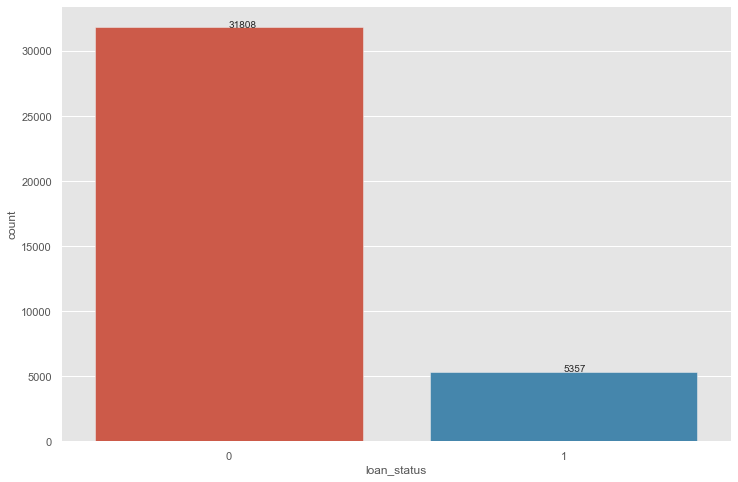

In [140]:
# check for amount of defaults in the data using countplot
sns.countplot(x="loan_status", data=loan_data)
default_count = loan_data.loan_status.value_counts()[1]
fully_paid_count = loan_data.loan_status.value_counts()[0]
plt.annotate(fully_paid_count, (0, fully_paid_count))
plt.annotate(default_count, (1, default_count))
plt.show()

> From above plot it can be observed that around 14% (5357) people are defaulters out of 37165

### Finding columns that effect more for loan default

In [164]:
# function to plot Barplot for univariate analysis
def plotUnivariateBarChart(x):
    sns.barplot(x=x, y='loan_status', data=loan_data.sort_values(by=x))
    plt.title("Loan Defaults w.r.t \'"+str(x)+"\' feature")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

In [165]:
# result column list
columns_affecting_default = []

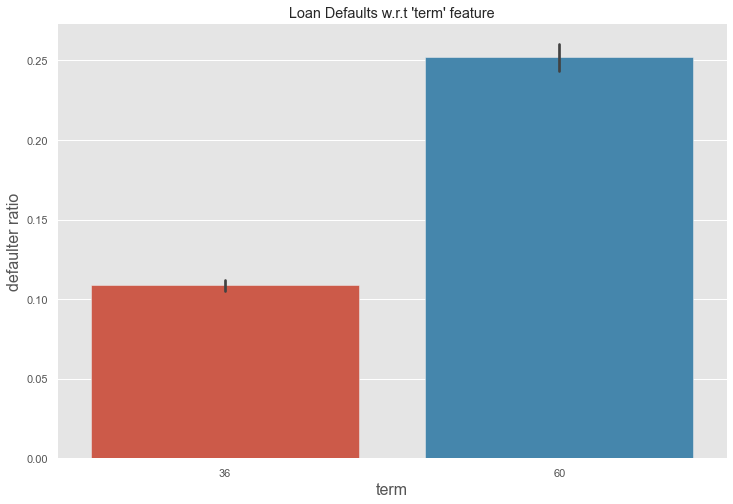

In [166]:
# check for defaulters wrt term 
plotUnivariateBarChart('term')

> From above plot for 'term' we can infer that the defaulters rate is increasing wrt term, hence the chances of loan getting deaulted is less for 36m than 60m.
>> so, column 'term' is affecting loan default -- add it to columns_affecting_default

In [167]:
# add 'term' col name to columns_affecting_default
columns_affecting_default.append('term')
columns_affecting_default

['term']

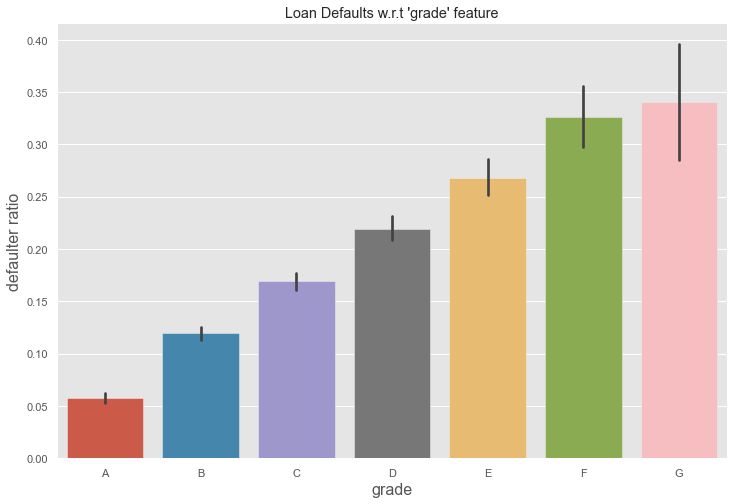

In [168]:
# check for defaulters wrt grade
plotUnivariateBarChart('grade')

> From above plot for 'grade' we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting deaulted increases with the grade from A moving towards G.
>> so, column 'grade' is affecting loan default -- add it to columns_affecting_default

In [169]:
# add 'grade' col name to columns_affecting_default
columns_affecting_default.append('grade')
columns_affecting_default

['term', 'grade']

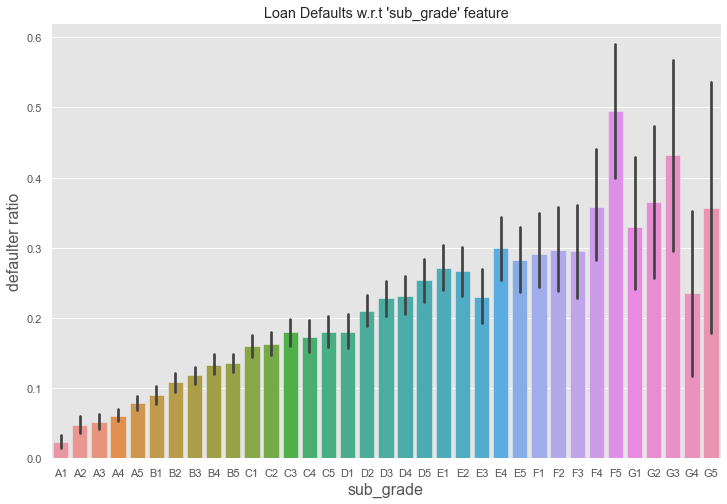

In [170]:
# check for defaulters wrt sub_grade
plotUnivariateBarChart('sub_grade')

> From above plot for 'sub_grade' we can infer that the defaulters rate is increasing wrt sub_grade, hence the chances of loan getting deaulted increases with the sub_grade from A1 moving towards G5
>> so, column 'sub_grade' is affecting loan default -- add it to columns_affecting_default

In [171]:
# add 'sub_grade' col name to columns_affecting_default
columns_affecting_default.append('sub_grade')
columns_affecting_default

['term', 'grade', 'sub_grade']

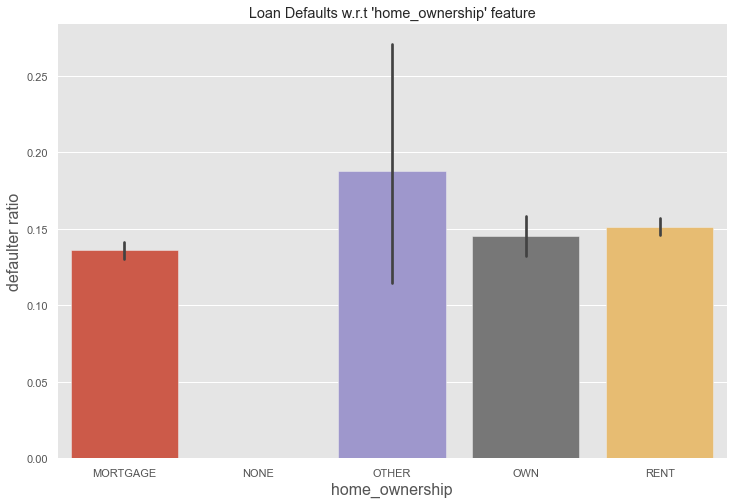

In [172]:
# check for defaulters wrt home_ownership
plotUnivariateBarChart('home_ownership')

> From above plot for 'home_ownership' we can infer that the defaulters rate is constant (it is quite more for OTHERS but we dont know what is in there, so let's not consider it for analysis), hence defaulter does not depends on home_ownership feature

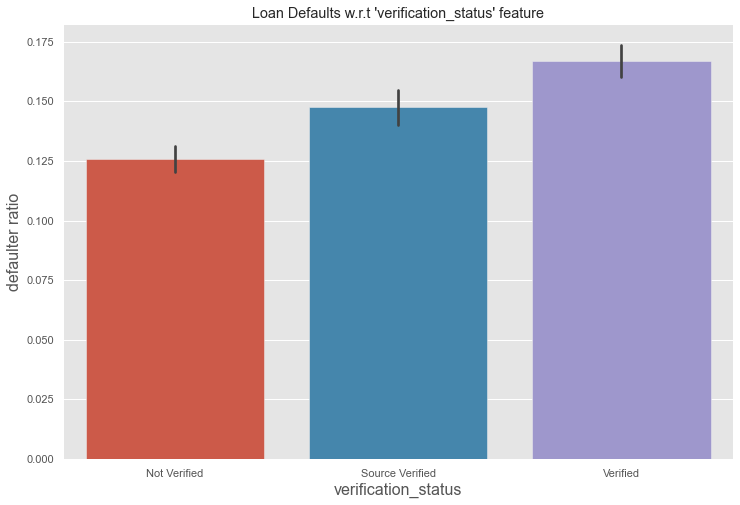

In [173]:
# check for defaulters wrt verification_status
plotUnivariateBarChart('verification_status')

> From above plot for 'verification_status' we can infer that the defaulters rate is increasing and is less for Not Verified users than Verified ones, but not useful for analysis.

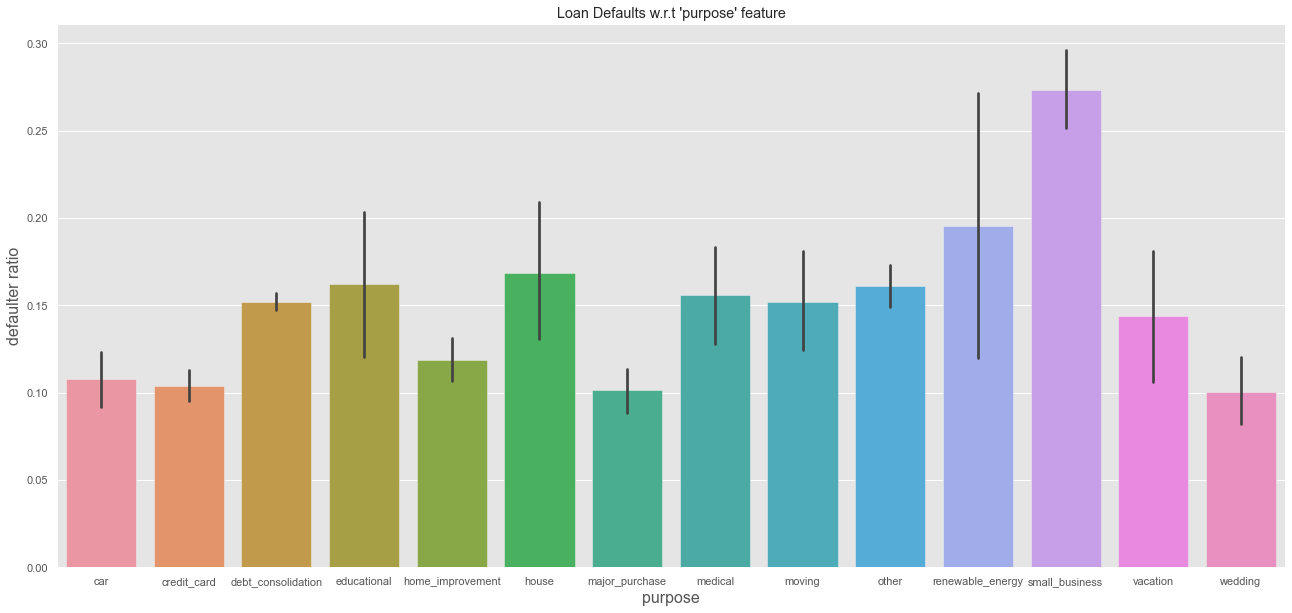

In [183]:
# check for defaulters wrt purpose
plt.figure(figsize=(22,10))
plotUnivariateBarChart('purpose')

> From above plot for 'purpose' we can infer that the defaulters rate is nearly constant for all purpose type except 'small business', hence default rate will depend on purpose of the loan
>> so, column 'purpose' is affecting loan default -- add it to columns_affecting_default

In [184]:
# add 'purpose' col name to columns_affecting_default
columns_affecting_default.append('purpose')
columns_affecting_default

['term', 'grade', 'sub_grade', 'purpose']

In [185]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'total_acc', 'month', 'year', 'loan_amnt_range', 'annual_inc_range', 'int_rate_range', 'dti_range'], dtype='object')

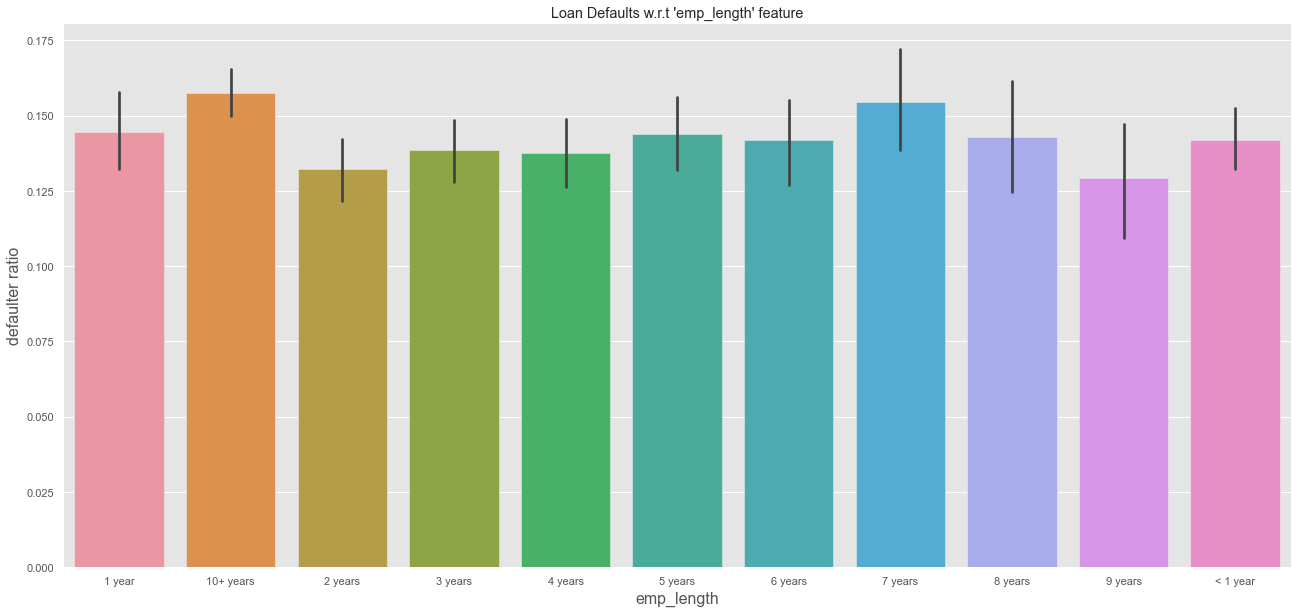

In [189]:
# check for defaulters wrt emp_length
plt.figure(figsize=(22,10))
plotUnivariateBarChart("emp_length")

> From above plot for 'emp_length' we can infer that the defaulters rate is constant here, hence defaulter does not depends on emp_length

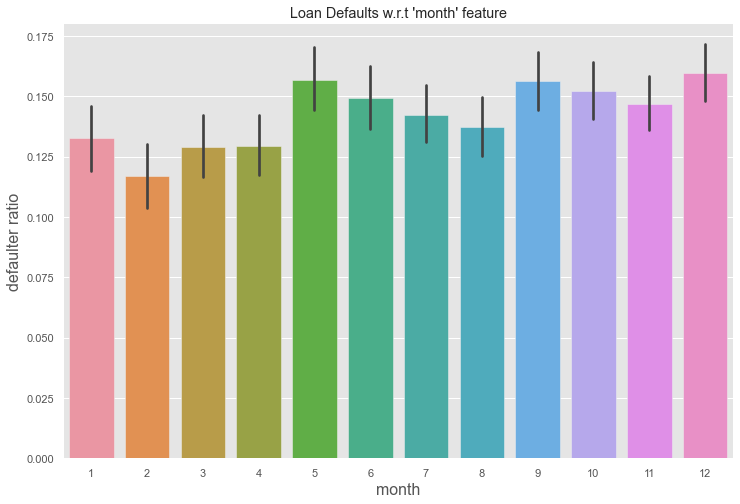

In [190]:
# check for defaulters wrt month
plotUnivariateBarChart('month')

> From above plot for 'month' we can infer that the defaulters rate is nearly constant here, not useful

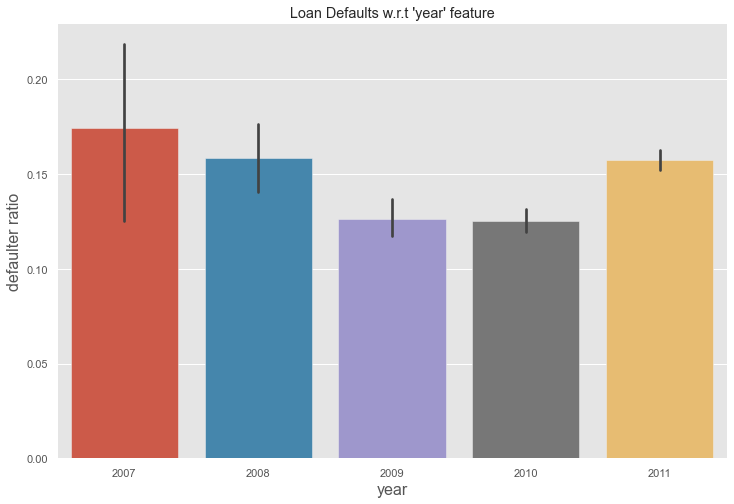

In [191]:
# check for defaulters wrt year
plotUnivariateBarChart('year')

> From above plot for 'year' we can infer that the defaulters rate is nearly constant here, not useful

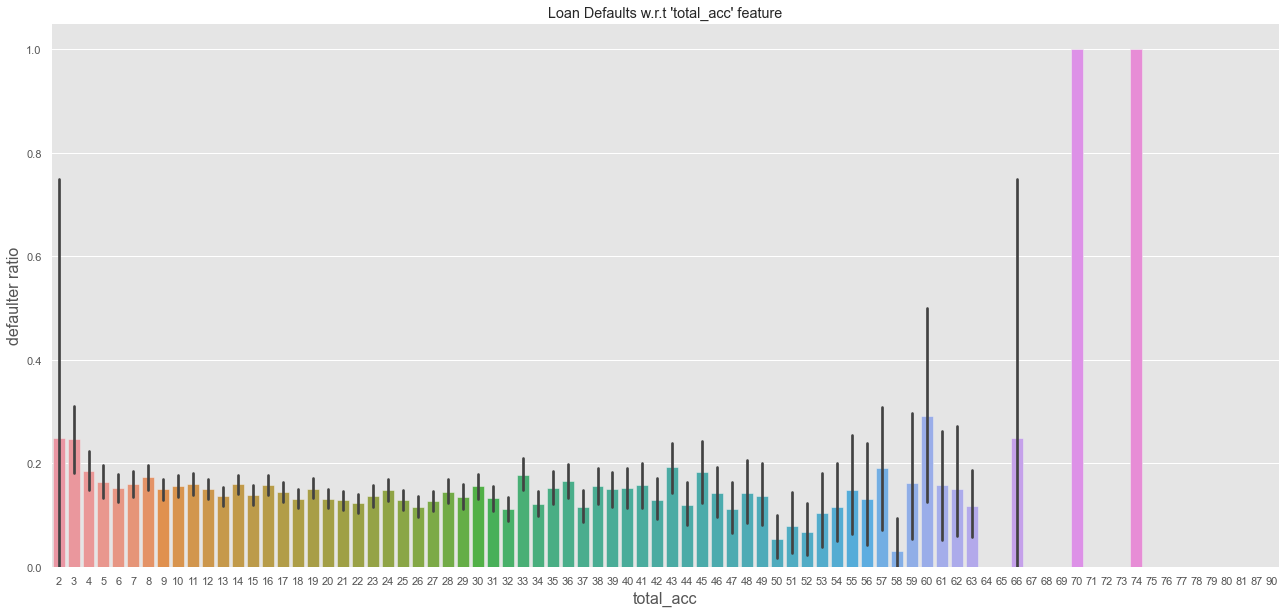

In [193]:
# check for defaulters wrt total_acc
plt.figure(figsize=(22,10))
plotUnivariateBarChart('total_acc')

> From above plot for 'total_acc' we can infer that the defaulters rate is nearly constant except for 70 and 74 which may be outlier, hence default rate will not depend on total_acc feature

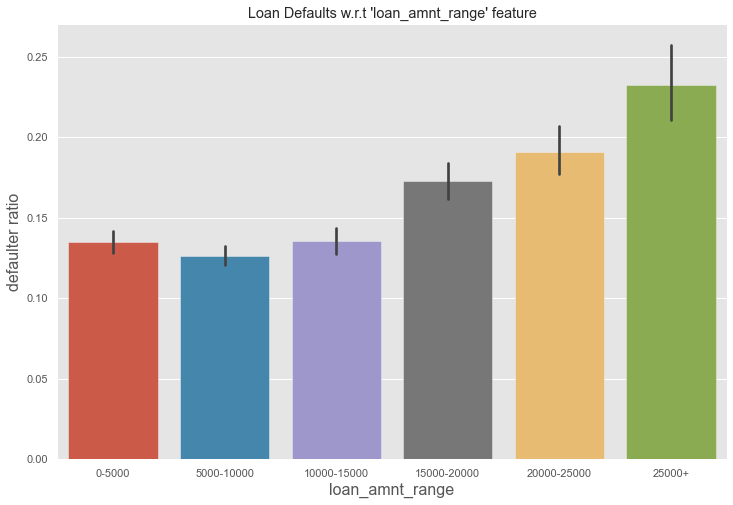

In [194]:
# check for defaulters wrt loan_amnt_range
plotUnivariateBarChart('loan_amnt_range')

> From above plot for 'loan_amnt_range' we can infer that the defaulters rate is increasing as loan_amnt_range increases, hence default rate will depend on loan_amnt_range feature
>> so, column 'loan_amnt_range' is affecting loan default -- add it to columns_affecting_default

In [195]:
# add 'loan_amnt_range' col name to columns_affecting_default
columns_affecting_default.append('loan_amnt_range')
columns_affecting_default

['term', 'grade', 'sub_grade', 'purpose', 'loan_amnt_range']

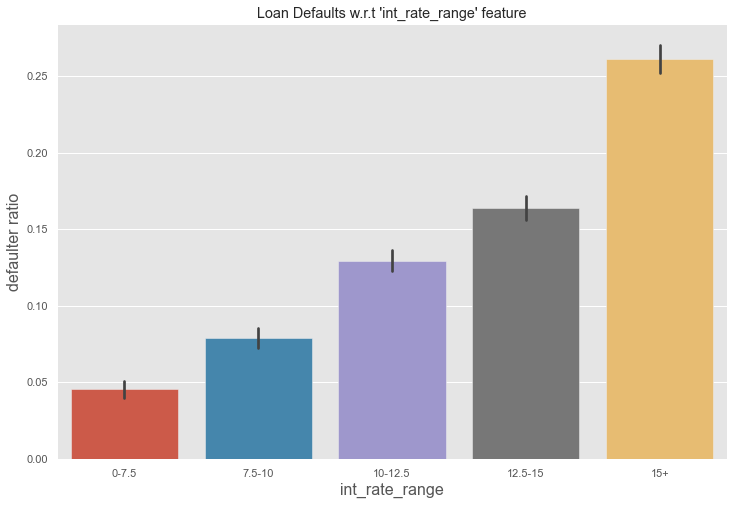

In [196]:
# check for defaulters wrt int_rate_range
plotUnivariateBarChart('int_rate_range')

> From above plot for 'int_rate_range' we can infer that the defaulters rate is increasing when int_rate_range values increases, hence default rate will depend on int_rate_range feature
>> so, column 'int_rate_range' is affecting loan default -- add it to columns_affecting_default

In [197]:
# add 'int_rate_range' col name to columns_affecting_default
columns_affecting_default.append('int_rate_range')
columns_affecting_default

['term', 'grade', 'sub_grade', 'purpose', 'loan_amnt_range', 'int_rate_range']

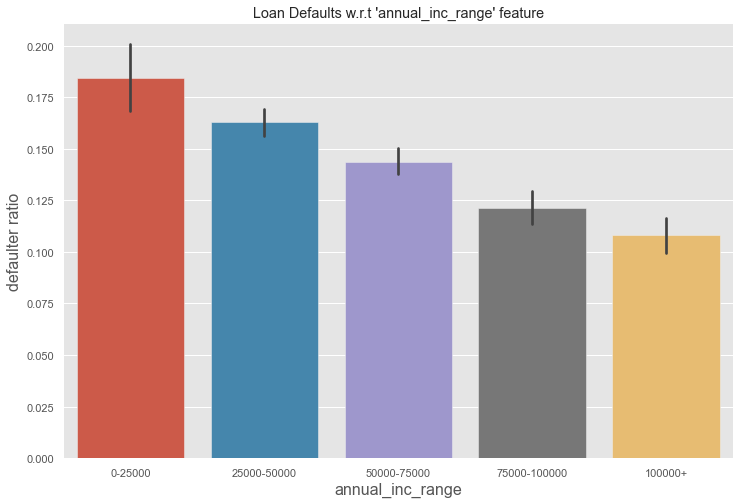

In [198]:
# check for defaulters wrt annual_inc_range
plotUnivariateBarChart('annual_inc_range')

> From above plot for 'annual_inc_range' we can infer that the defaulters rate is decreasing as with annual_inc_range values, hence default rate will depend on annual_inc_range feature
>> so, column 'annual_inc_range' is affecting loan default -- add it to columns_affecting_default

In [199]:
# add 'annual_inc_range' col name to columns_affecting_default
columns_affecting_default.append('annual_inc_range')
columns_affecting_default

['term',
 'grade',
 'sub_grade',
 'purpose',
 'loan_amnt_range',
 'int_rate_range',
 'annual_inc_range']

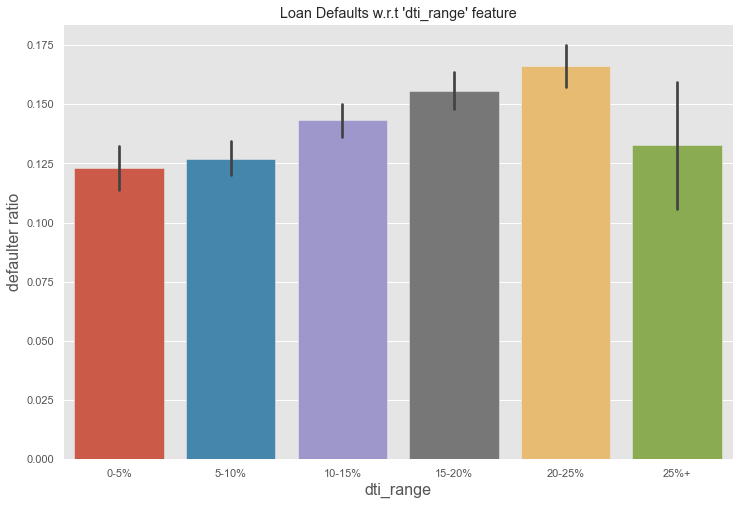

In [200]:
# check for defaulters wrt dti_range
plotUnivariateBarChart('dti_range')

> From above plot for 'dti_range' we can infer that the defaulters rate is increasing as with dti_range values, hence default rate will depend on dti_range feature
>> so, column 'dti_range' is affecting loan default -- add it to columns_affecting_default

In [201]:
# add 'dti_range' col name to columns_affecting_default
columns_affecting_default.append('dti_range')
columns_affecting_default

['term',
 'grade',
 'sub_grade',
 'purpose',
 'loan_amnt_range',
 'int_rate_range',
 'annual_inc_range',
 'dti_range']

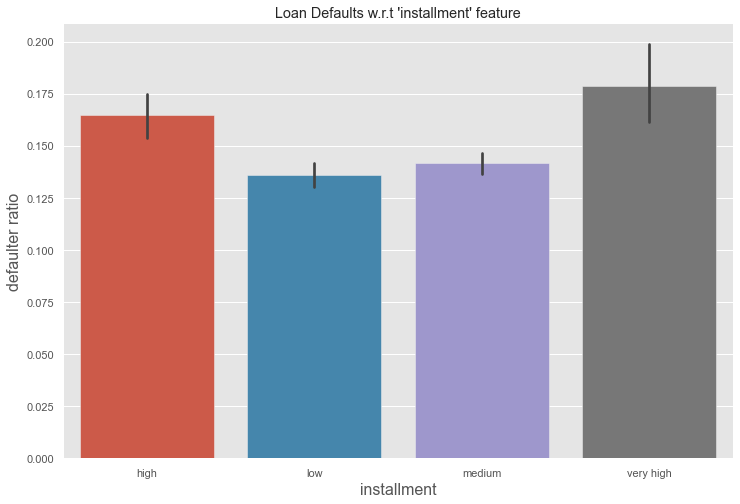

In [202]:
# check for defaulters wrt installment range
plotUnivariateBarChart('installment')

> From above plot for 'installment' we can infer that the defaulters rate is increasing as with installment values, hence default rate will depend on installment feature
>> so, column 'installment' is affecting loan default -- add it to columns_affecting_default

In [203]:
# add 'installment' col name to columns_affecting_default
columns_affecting_default.append('installment')
columns_affecting_default

['term',
 'grade',
 'sub_grade',
 'purpose',
 'loan_amnt_range',
 'int_rate_range',
 'annual_inc_range',
 'dti_range',
 'installment']

In [204]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'total_acc', 'month', 'year', 'loan_amnt_range', 'annual_inc_range', 'int_rate_range', 'dti_range'], dtype='object')

#### Till here for Univariate analysis the columns that effect default ration are 

In [205]:
print(columns_affecting_default)

['term', 'grade', 'sub_grade', 'purpose', 'loan_amnt_range', 'int_rate_range', 'annual_inc_range', 'dti_range', 'installment']


### Bivariate Analyses

In [206]:
# function to plot scatter plot for two features
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=loan_data)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=loan_data)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

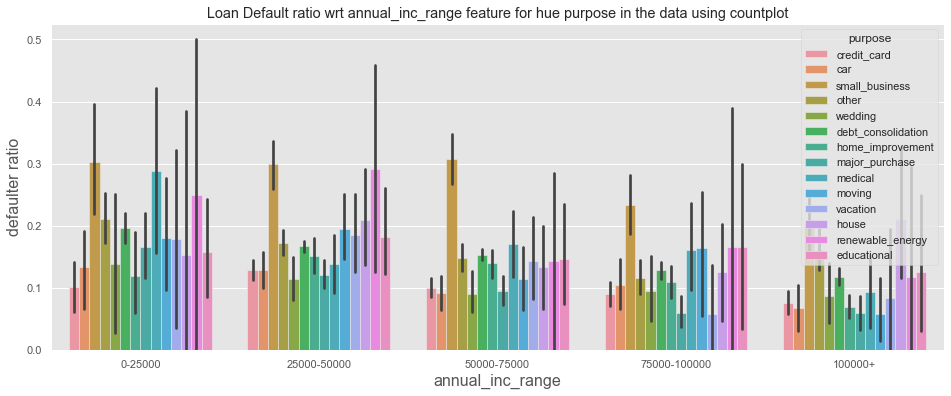

In [207]:
# check for defaulters wrt annual_inc and purpose
plotBivariateBar("annual_inc_range", "purpose")

> From above plot, we can infer it doesn't shows any correlation

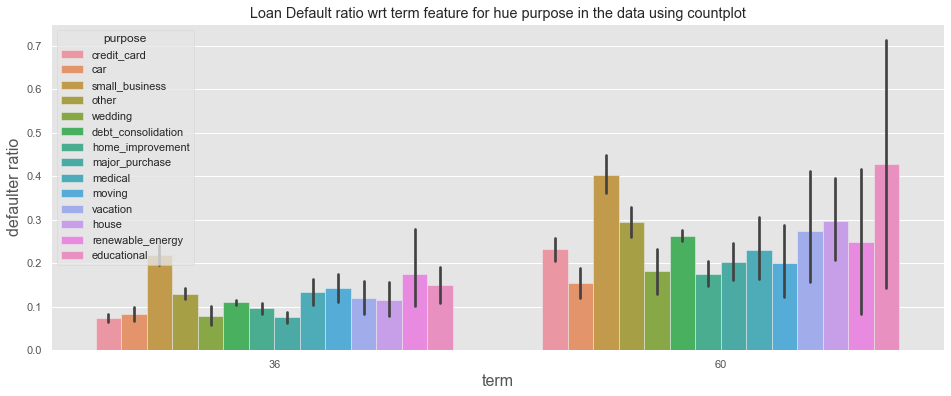

In [208]:
# check for defaulters wrt term and purpose in the data 
plotBivariateBar("term", "purpose")

> __As we can see straight lines on the plot, default ratio increases for every purpose wrt term__

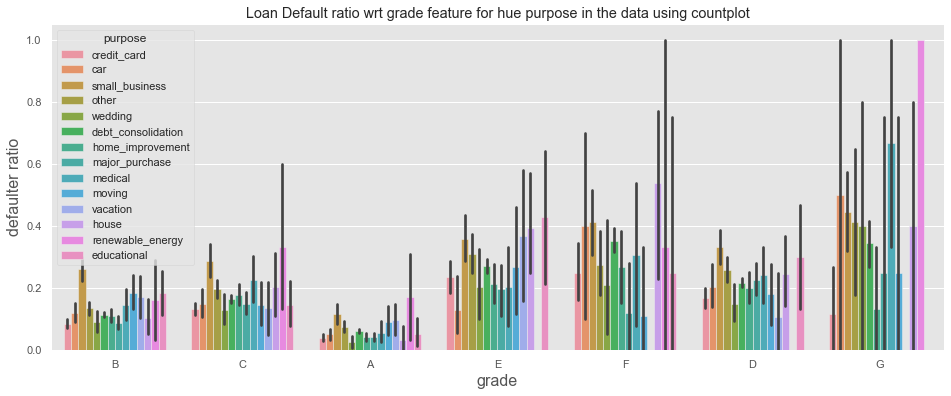

In [209]:
# check for defaulters wrt grade and purpose in the data 
plotBivariateBar("grade", "purpose")

> __As we can see straight lines on the plot, default ratio increases for every purpose wrt grade__

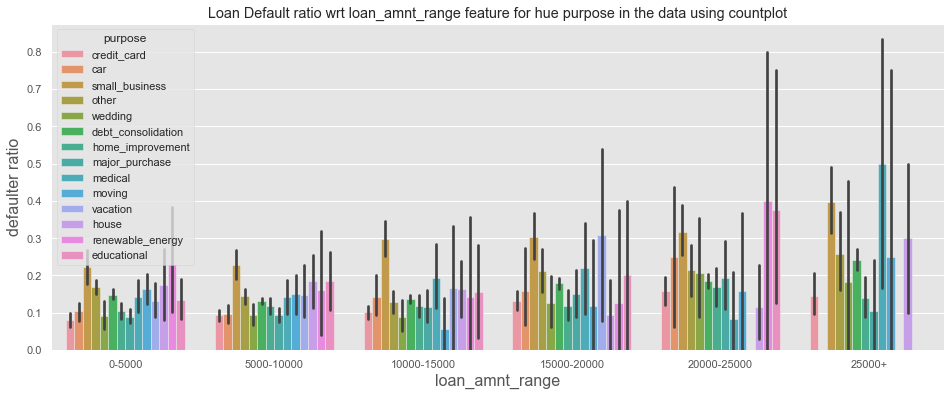

In [210]:
# check for defaulters wrt loan_amnt_range and purpose in the data
plotBivariateBar("loan_amnt_range", "purpose")

> As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range

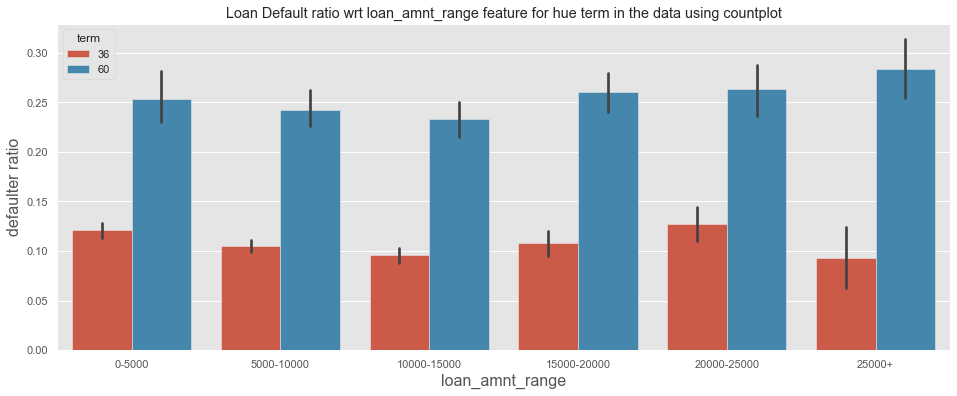

In [211]:
# check for defaulters wrt loan_amnt_range and term in the data
plotBivariateBar("loan_amnt_range", "term")

> As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range

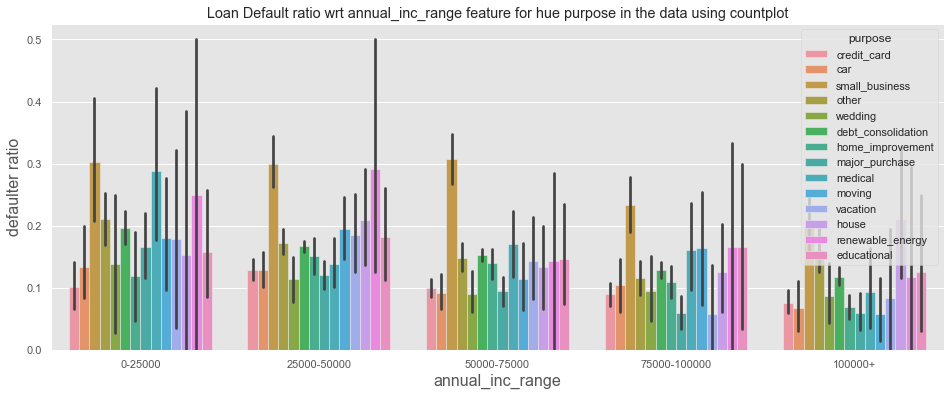

In [212]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("annual_inc_range", "purpose")

> As we can see straight lines on the plot, default ratio increases for every purpose wrt annual_inc_range

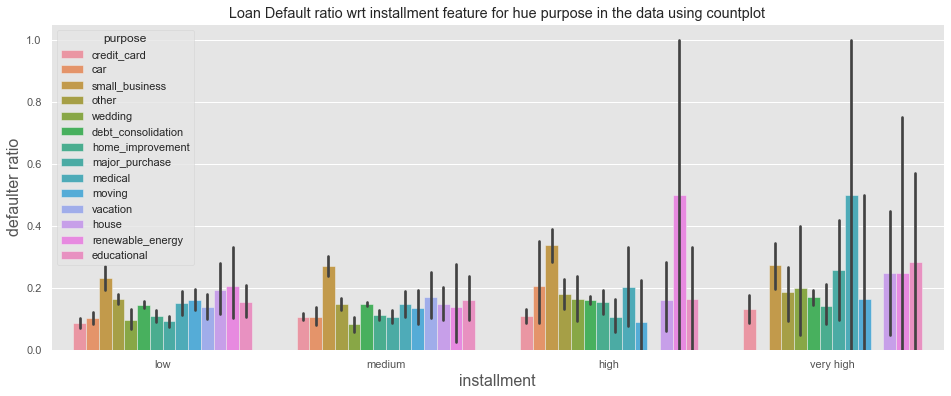

In [213]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("installment", "purpose")

> As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business

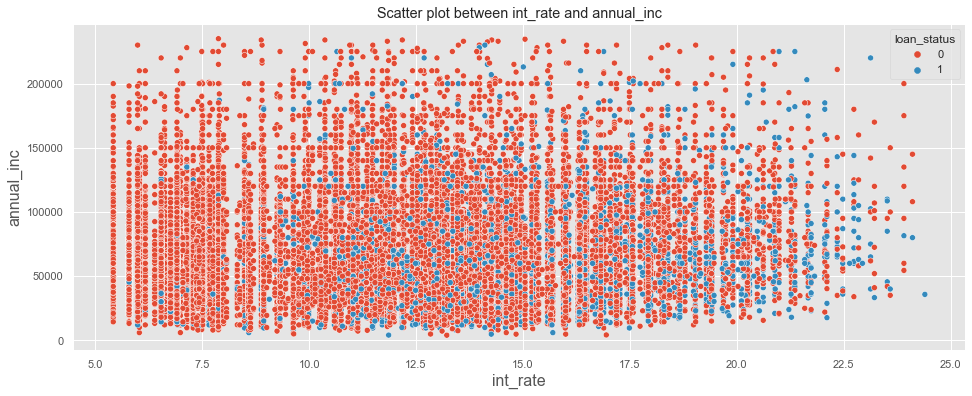

In [214]:
# check for defaulters wrt loan_amnt_range in the data
plotScatter("int_rate", "annual_inc")

> As we can see straight lines on the plot, there is no relation between above mentioned features

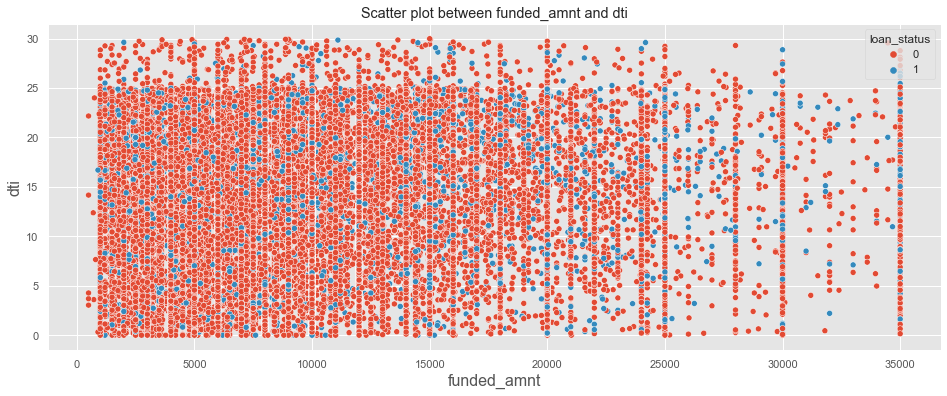

In [216]:
# plot scatter for funded_amnt_inv with dti
plotScatter("funded_amnt", "dti")

> As we can see straight lines on the plot, there is no relation between above mentioned features

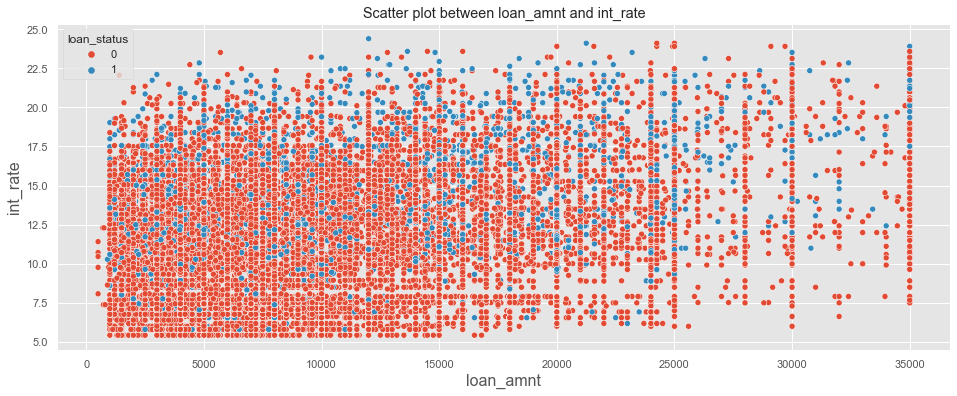

In [218]:
# plot scatter for loan_amnt with int_rate
plotScatter("loan_amnt", "int_rate")

> As we can see straight line patterns on the plot, there is no relation between above mentioned features

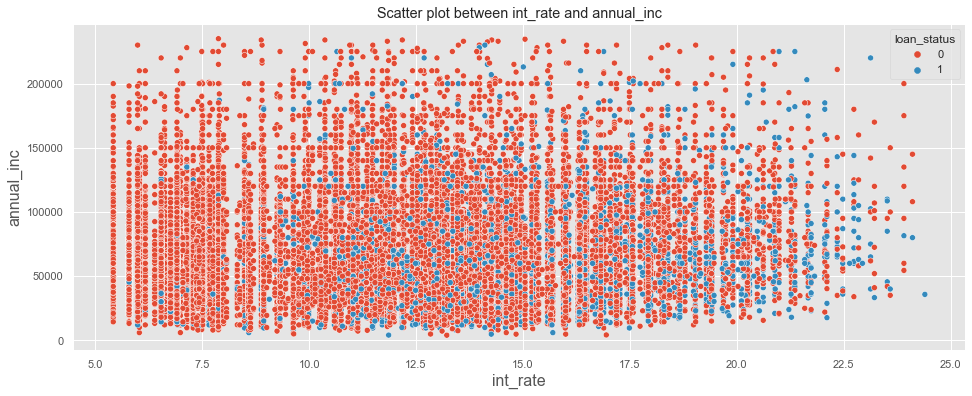

In [219]:
# plot scatter for int_rate with annual_inc
plotScatter("int_rate", "annual_inc")

> As we can see negative correlation pattern with reduced density on the plot, there is some relation between above mentioned features

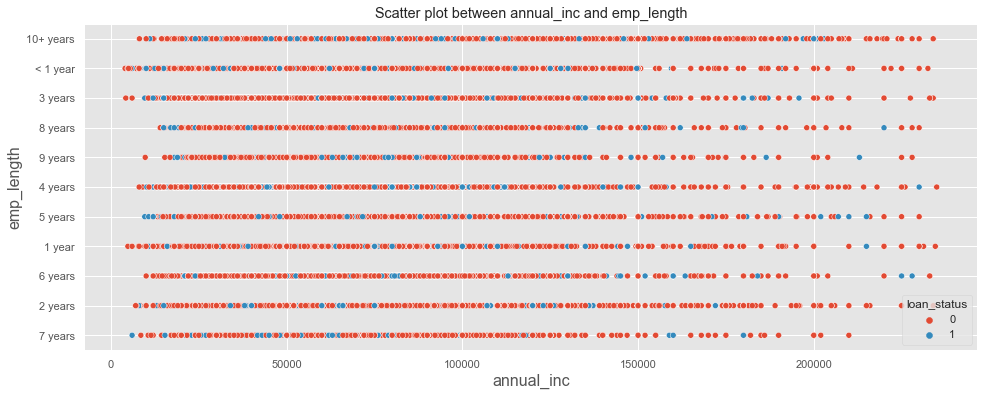

In [220]:
# plot scatter for annual_inc with emp_length
plotScatter("annual_inc", "emp_length")

> As we can see straight line patterns on the plot, there is no relation between above mentioned features

In [221]:
columns_affecting_default

['term',
 'grade',
 'sub_grade',
 'purpose',
 'loan_amnt_range',
 'int_rate_range',
 'annual_inc_range',
 'dti_range',
 'installment']

## Conclusions

After analysing all the features(columns) the __driving factors (or driver variables)__ are
<b>
1. term
2. grade
3. sub_grade
4. purpose
5. loan_amnt
6. int_rate
7. annual_inc
8. dti_range
9. installment
</b>